In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import pandas as pd
import folium
from folium import plugins


## Table order_20161105

In [18]:
order = pd.read_csv('order_20161105',names = ['order_id', 'depature_time', 'arrival_time', 'departure_longi', 'departure_lati', 'arrival_longi', 'arrival_lati'])
order.head(1)

,order_id,depature_time,arrival_time,departure_longi,departure_lati,arrival_longi,arrival_lati
0,db54bf9991be4fda5a958d6a1e70cdac,1478346519,1478347166,104.060341,30.653753,104.05643,30.62952


In [64]:
order.shape

(242812, 10)

In [19]:
# Non nan value
order.isna().sum()

order_id           0
depature_time      0
arrival_time       0
departure_longi    0
departure_lati     0
arrival_longi      0
arrival_lati       0
dtype: int64

In [21]:
# 208406 oders in file
order["order_id"].nunique()
# order[["order_id", "depature_time","arrival_time"]].nunique()

208406

In [57]:
len(df["vehicle_id"].unique())

40453

In [25]:
# From timestamp to datetime, and interval to present the trip duration
order["departure"] = order["depature_time"].apply(lambda x: datetime.fromtimestamp(x))
order["arrival"] = order["arrival_time"].apply(lambda x: datetime.fromtimestamp(x))
order["interval"] = order["arrival"] - order["departure"]

In [29]:
# What is the earliest order (earliest departure time)? 2016-11-04 17:01:59
print ("earlist arrival time")
print(datetime.fromtimestamp(order["arrival_time"].min() ))
print()
print ("earlist depature time")
order[order["depature_time"] == order["depature_time"].min()]


##order["depature_time"].max()

earlist arrival time
2016-11-04 17:07:11

earlist depature time


,order_id,depature_time,arrival_time,departure_longi,departure_lati,arrival_longi,arrival_lati,departure,arrival,interval
100595,7fb6e1aa8f5723a2e462f69cb7f7bd2e,1478275319,1478276390,104.03745,30.69321,104.090449,30.6797,2016-11-04 17:01:59,2016-11-04 17:19:50,00:17:51


In [28]:
# What is the latest order (latest arrival time)? 2016-11-07 04:21:37
print ("latest depature time")
print(datetime.fromtimestamp(order["depature_time"].max() ))
print ()
print ("latest arrival time")    
order[order["arrival_time"] == order["arrival_time"].max()]


latest depature time
2016-11-05 16:59:59

latest arrival time


,order_id,depature_time,arrival_time,departure_longi,departure_lati,arrival_longi,arrival_lati,departure,arrival,interval
129434,9080fbdcfd9804e1a1d1ca384991efb7,1478316843,1478488897,104.06963,30.67881,103.95862,30.57937,2016-11-05 04:34:03,2016-11-07 04:21:37,1 days 23:47:34


In [30]:
# There are orders whose trip duration depass 1 days which is not normal
order["interval"].describe()

count                    242812
mean     0 days 00:23:18.191329
std      0 days 00:17:39.301298
min             0 days 00:00:02
25%             0 days 00:13:34
50%             0 days 00:20:18
75%             0 days 00:29:32
max             1 days 23:47:34
Name: interval, dtype: object

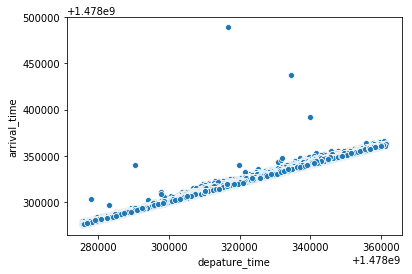

In [46]:
# There are some outliers whose interval is to big

# sns.distplot(order["arrival_time"])
# sns.distplot(order["depature_time"])
sns.scatterplot(order["depature_time"],order["arrival_time"] )
# plot(order["depature_time"])


## Table gps_20161105

In [ ]:
df = pd.read_csv("gps_20161105", names = ["vehicle_id", "order_id", "universal_time", "longitude", "latitude"])

In [48]:
df.shape

(39258427, 5)

In [58]:
df.head(3)

,vehicle_id,order_id,universal_time,longitude,latitude
0,ba24f3742757f3e1c0cb0e506b867392,2e41bed7e559276a49f54843b48f1d11,1478306899,104.04349,30.72275
1,ba24f3742757f3e1c0cb0e506b867392,2e41bed7e559276a49f54843b48f1d11,1478306902,104.04391,30.72308
2,ba24f3742757f3e1c0cb0e506b867392,2e41bed7e559276a49f54843b48f1d11,1478306905,104.04433,30.72342


In [ ]:
describe_df = df.describe()

In [49]:
describe_df

,universal_time,longitude,latitude
count,3.925843e+07,3.925843e+07,3.925843e+07
mean,1.478329e+09,1.040792e+02,3.067960e+01
std,1.841044e+04,2.172299e-02,1.953130e-02
min,1.478275e+09,1.040421e+02,3.065294e+01
25%,1.478316e+09,1.040606e+02,3.066250e+01
50%,1.478330e+09,1.040776e+02,3.067536e+01
75%,1.478343e+09,1.040971e+02,3.069419e+01
max,1.478362e+09,1.041296e+02,3.072775e+01


In [50]:
df.dtypes

vehicle_id         object
order_id           object
universal_time      int64
longitude         float64
latitude          float64
dtype: object

In [60]:
pd.isna(df["longitude"]).sum()

0

In [53]:
df["order_id"].nunique()

208406

In [59]:
# choose first vehicle and it orders in day:  An vehicle can have diffrent order in a day.
df[df["vehicle_id"] == df.head(10)[["vehicle_id"]].iloc[0,0]]["order_id"].unique()

array(['2e41bed7e559276a49f54843b48f1d11',
       '9aa9f8fbca78fed3ee82b7dea8da9300',
       'c2570acda0a89804bce5ecd5485e3ce1',
       'bfbf733c5fec722f610f732697055148',
       '1a9b1061a8bc05d15b8c39014cef014b',
       '6f6fb2ea71a1dafe8dccaa9c4b88a7da',
       '31f20c53013495fa667b76a7cad39cdc',
       '40f2d4fb9d72268d1e8abe859fa4bb27',
       '7c79e678f599aa7ed713f64eedfd153f',
       '6d52f58f074c39dbb9dcead9e5843269'], dtype=object)

In [56]:
print ("min uniserval_time: " +  (datetime.fromtimestamp(df["universal_time"].min()).strftime('%Y-%M-%D %H:%M:%S')))
# datetime.fromtimestamp(df["universal_time"].min() )
print ("max universal_time: " + str(datetime.fromtimestamp(df["universal_time"].max()).strftime('%Y-%M-%D %H:%M:%S')) )
# datetime.fromtimestamp(df["universal_time"].max() )

min uniserval_time: 2016-02-11/04/16 17:02:24
max universal_time: 2016-59-11/05/16 16:59:59


In [51]:
max_longitude = df["longitude"].max()
min_longitude = df["longitude"].min()

max_latitude = df["latitude"].max()
min_latitude = df["latitude"].min()

print("max longitude : {:.4f}\nmin_longitude: {:.4f}\nmax latitude : {:.4f}\nmin latitude : :{:.4f}".format(max_longitude,min_longitude, max_latitude, min_latitude))

max longitude : 104.1296
min_longitude: 104.0421
max latitude : 30.7278
min latitude : :30.6529


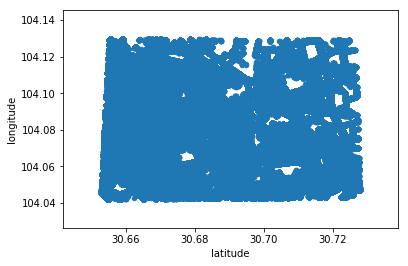

In [61]:
df.plot.scatter(x = "latitude", y ="longitude")

In [62]:
# Plot contour
# max_longitude = df["longitude"].max()
# min_longitude = df["longitude"].min()
# max_latitude = df["latitude"].max()
# min_latitude = df["latitude"].min()
min_lati, min_longi, max_lati, max_longi = min_latitude ,min_longitude, max_latitude,max_longitude
num_block_row = 30
num_blok_column = 30

diff_lati, diff_long = (max_lati-min_lati)/(num_block_row-1), (max_longi-min_longi)/(num_blok_column -1)
# Place map, latitude, longitude, and zoom level
#gmap = gmplot.GoogleMapPlotter((min_lati + max_lati) / 2, (min_longi + max_longi) / 2, 13)
maps = folium.Map([df['latitude'].mean(), df['longitude'].mean()], zoom_start=13)
# plot contour with polygon
lats, lons = zip(*[
    (min_lati, min_longi),
    (min_lati, max_longi),
    (max_lati, max_longi),
    (max_lati, min_longi),
     (min_lati, min_longi)
])
contours = [    (min_lati, min_longi),
    (min_lati, max_longi),
    (max_lati, max_longi),
    (max_lati, min_longi),
     (min_lati, min_longi)]
start_lati, start_long = max_lati, min_longi
maps.add_children(folium.PolyLine(contours, color="red", weight=2.5, opacity=1).add_to(maps))

C:\Users\jj187\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [63]:
# Plot contour
from gmplot import gmplot
min_lati, min_longi, max_lati, max_longi = min_latitude ,min_longitude, max_latitude,max_longitude
num_block_row = 30
num_blok_column = 30

diff_lati, diff_long = (max_lati-min_lati)/(num_block_row-1), (max_longi-min_longi)/(num_blok_column -1)
# gmplot version: Place map, latitude, longitude, and zoom level
# gmap = gmplot.GoogleMapPlotter((min_lati + max_lati) / 2, (min_longi + max_longi) / 2, 13)
maps = folium.Map([df['latitude'].mean(), df['longitude'].mean()], zoom_start=13)
# plot contour with polygon
lats, lons = zip(*[
    (min_lati, min_longi),
    (min_lati, max_longi),
    (max_lati, max_longi),
    (max_lati, min_longi),
     (min_lati, min_longi)
])
contours = [    (min_lati, min_longi),
    (min_lati, max_longi),
    (max_lati, max_longi),
    (max_lati, min_longi),
     (min_lati, min_longi)]
start_lati, start_long = max_lati, min_longi

for lat_i in range(num_block_row -1):
    for long_i in range(num_blok_column -1):
#         zone_lats, zone_lons = zip(*[
#             (start_lati, start_long),
#             (start_lati, start_long + diff_long),
#             (start_lati - diff_lati, start_long + diff_long),
#             (start_lati - diff_lati, start_long),
#             (start_lati, start_long)
#         ])
        
        # points is tuples a list of tuples containing latitude and longitude information,
        points = [(start_lati, start_long),
            (start_lati, start_long + diff_long),
            (start_lati - diff_lati, start_long + diff_long),
            (start_lati - diff_lati, start_long),
            (start_lati, start_long)]
        folium.PolyLine(points).add_to(maps)

#         gmap.plot(zone_lats, zone_lons, 'cornflowerblue', edge_width=5)
#         print('Latitude: {} - {}'.format(start_lati, start_lati - diff_lati))
#         print('Longitude: {} - {}'.format(start_long, start_long + diff_long))
        start_long += diff_long
    start_long = min_longi
    start_lati -= diff_lati
# gmap.plot(lats, lons, 'cornflowerblue', edge_width=10)*
# gmap.draw('./contour_test.html')
maps.add_children(folium.PolyLine(contours, color="red", weight=2.5, opacity=1).add_to(maps))


C:\Users\jj187\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [66]:
####### New features
## This operation takes a lot of time: 5min
# Take just the order on day 20161105
df["time"] = df["universal_time"].apply(lambda x: datetime.fromtimestamp(x))
df["day"] = df["time"].apply(lambda x: x.day)
df["hour"] = df["time"].apply(lambda x: x.hour)
df["minute"] = df["time"].apply(lambda x: x.minute)

In [67]:
df["time"].describe()


count                39258427
unique                  86230
top       2016-11-05 11:10:11
freq                      952
first     2016-11-04 17:02:24
last      2016-11-05 16:59:59
Name: time, dtype: object

In [68]:
df.to_csv("gps_enrichement_20161105", header= True)

# Order & Trip cross anlysis

In [31]:
df[df["order_id"] == "9080fbdcfd9804e1a1d1ca384991efb7"].head(5)

,vehicle_id,order_id,universal_time,longitude,latitude
13450363,611aaef245a7569bf5a2f8e1fc370609,9080fbdcfd9804e1a1d1ca384991efb7,1478316844,104.06920,30.67921
13450364,611aaef245a7569bf5a2f8e1fc370609,9080fbdcfd9804e1a1d1ca384991efb7,1478316847,104.06902,30.67936
13450365,611aaef245a7569bf5a2f8e1fc370609,9080fbdcfd9804e1a1d1ca384991efb7,1478316851,104.06904,30.67934
13450366,611aaef245a7569bf5a2f8e1fc370609,9080fbdcfd9804e1a1d1ca384991efb7,1478316853,104.06902,30.67936
13450367,611aaef245a7569bf5a2f8e1fc370609,9080fbdcfd9804e1a1d1ca384991efb7,1478316857,104.06899,30.67938


In [65]:
order_id = "9080fbdcfd9804e1a1d1ca384991efb7"
maps = folium.Map([df['latitude'].mean(), df['longitude'].mean()], zoom_start=13)
g = df.loc[df['order_id'] == order_id]
gps_arr = g[['latitude', 'longitude']].as_matrix().tolist()
o = order.loc[order['order_id'] == order_id]
folium.Marker([o.iloc[0]['departure_lati'], o.iloc[0]['departure_longi']], icon=folium.Icon(color='blue')).add_to(maps)
folium.Marker([o.iloc[0]['arrival_lati'], o.iloc[0]['arrival_longi']], icon=folium.Icon(color='red')).add_to(maps)

maps.add_children(plugins.HeatMap(gps_arr, radius=8))

C:\Users\jj187\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\jj187\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  if __name__ == '__main__':


In [89]:
df_gps = pd.DataFrame(gps_arr, columns= ["Latitude", "Logitude"])
df_gps.to_csv("gps_to_correct.csv", header=True)

In [74]:
## We have found that folium have a problem / Which map api should we use? 
## We suppose that folium is not precise when showing the chinese maps
gps_arr_rounded = [[round(i[0],4),round(i[1],4)]  for i in gps_arr] 

In [76]:
gps_arr[0]

[30.679209999999998, 104.0692]

In [99]:
changed_gps_df = pd.read_csv("changed_lati_longi.csv")[["lat","lng"]]
changed_gps_df.head(4)
maps = folium.Map([df['latitude'].mean(), df['longitude'].mean()], zoom_start=13)

gps_arr_new = changed_gps_df[['lat', 'lng']].as_matrix().tolist()

folium.Marker([o.iloc[0]['departure_lati'], o.iloc[0]['departure_longi']], icon=folium.Icon(color='blue')).add_to(maps)
folium.Marker([o.iloc[0]['arrival_lati'], o.iloc[0]['arrival_longi']], icon=folium.Icon(color='red')).add_to(maps)

maps.add_children(plugins.HeatMap(gps_arr_new, radius=8))

C:\Users\jj187\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\jj187\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  # Remove the CWD from sys.path while we load stuff.


In [82]:
## We fist show it in 
# WGS → GCJ (30.67679010, 104.07171457)
# 30°40′36.4444″ N, 104°4′18.1725″ E	3.6087819326709973e+2	4.4636252962904927e-1
# WGS → BD	(30.68275776, 104.07820805)
# 30°40′57.9279″ N, 104°4′41.549″ E	9.474721655137274e+2	4.519667309736068e-1
# GCJ → WGS	(30.68162990, 104.06668543)
# 30°40′53.8676″ N, 104°4′0.0675″ E	3.608741781422174e+2	4.8747867042165216e-1
# BD → WGS	(30.67552913, 104.06024429)
# 30°40′31.9049″ N, 104°3′36.8794″ E	9.492404027720212e+2	6.084565496885906e-1
# GCJ →cai WGS	(30.68163220, 104.06668976)
# 30°40′53.8759″ N, 104°4′0.0831″ E	3.607894087538369e+2	1.1075121715990025e-3
# BD →cai WGS	(30.67553271, 104.06024910)
# 30°40′31.9178″ N, 104°3′36.8968″ E	9.486535368412713e+2	7.679504814501125e-3
# GCJ → BD	(30.68521830, 104.07567994)
# 30°41′6.7859″ N, 104°4′32.4478″ E	9.112284502204099e+2	3.75433512417037e-2
# BD → GCJ	(30.67309716, 104.06274656)
# 30°40′23.1498″ N, 104°3′45.8876″ E	9.181055380553465e+2	8.079961529500303e-2
# BD →cai GCJ	(30.67309784, 104.06274626)
# 30°40′23.1522″ N, 104°3′45.8865″ E	9.180685167678234e+2	5.134109781335743e-4

# point = [[30.67679010, 104.07171457]]
# point = [[30.68275776, 104.07820805]]

point = [[30.68162990, 104.06668543]]   ##GCJ → WGS
maps = folium.Map([df['latitude'].mean(), df['longitude'].mean()], zoom_start=13)
folium.Marker(gps_arr[0], icon=folium.Icon(color='red')).add_to(maps)
maps.add_children(plugins.HeatMap(point, radius=8))
# maps.add_children(plugins.HeatMap(gps_arr[0], radius=8))

C:\Users\jj187\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
